In [1]:
%%capture
%pip install pandas matplotlib numpy

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_parquet('data/refined/df.parquet')

In [4]:
df = df[df['ct_classificacao'] == 'PF']

In [5]:
df.dtypes

ct_uf                                      category
ct_tcb                                     category
ct_sr                                      category
ct_cliente                                 category
ct_ocupacao                                category
ct_cnae_secao                              category
ct_cnae_subclasse                          category
ct_porte                                   category
ct_modalidade                              category
ct_origem                                  category
ct_indexador                               category
nu_numero_de_operacoes                        int32
vl_a_vencer_ate_90_dias                     float64
vl_a_vencer_de_91_ate_360_dias              float64
vl_a_vencer_de_361_ate_1080_dias            float64
vl_a_vencer_de_1081_ate_1800_dias           float64
vl_a_vencer_de_1801_ate_5400_dias           float64
vl_a_vencer_acima_de_5400_dias              float64
vl_vencido_acima_de_15_dias                 float64
vl_carteira_

### Análises Joca (Label Temporária)

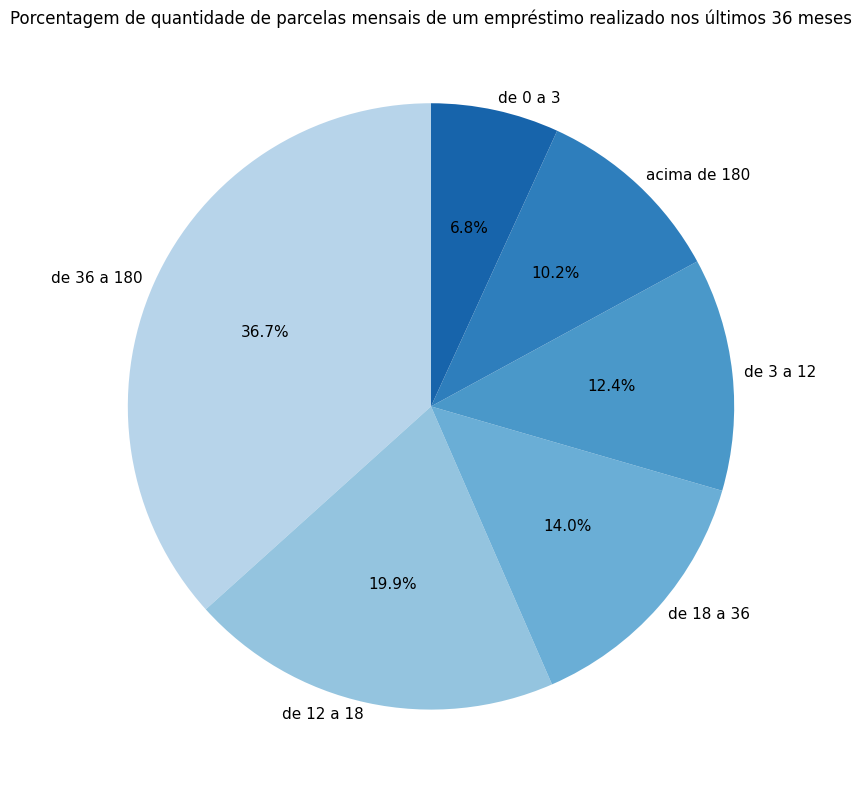

In [6]:
data_atual = datetime.today()
data_limite = data_atual - timedelta(days=36*30)
df_filtered = df[df['dt_data_base'] > pd.to_datetime(data_limite)]

LABELS = {
    '> 180': 'acima de 180',
    '36-180': 'de 36 a 180',
    '18-36': 'de 18 a 36',
    '12-18': 'de 12 a 18',
    '3-12': 'de 3 a 12',
    '0-3': 'de 0 a 3'
}

grouped = df_filtered['ct_faixa_meses_ate_vencimento'].value_counts(normalize=True) * 100
labels_mapeados = [LABELS.get(label, label) for label in grouped.index]

num_colors = len(grouped)
colors = plt.get_cmap('Blues')(np.linspace(0.3, 0.8, num_colors))


plt.figure(figsize=(8, 8))
plt.pie(
    grouped.values,
    labels=labels_mapeados,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    labeldistance=1.04,
    textprops={'fontsize': 11}
)
plt.axis('equal')
plt.title('Porcentagem de quantidade de parcelas mensais de um empréstimo realizado nos últimos 36 meses')
plt.tight_layout()
plt.show()

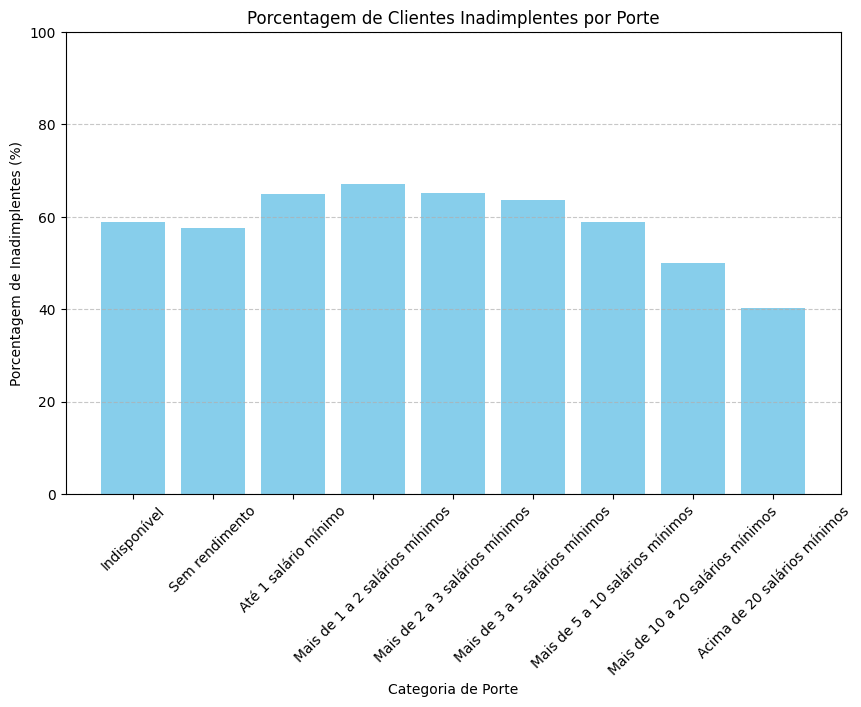

In [7]:
inadimplentes = df[df['vl_carteira_inadimplida_arrastada'] != 0.00]
inadimplentes_por_porte = inadimplentes.groupby('ct_porte').size() / df.groupby('ct_porte').size() * 100

ordem = [
    "Indisponível",
    "Sem rendimento",
    "Micro",
    "Pequeno",
    "Médio",
    "Grande",
    "Até 1 salário mínimo",
    "Mais de 1 a 2 salários mínimos",
    "Mais de 2 a 3 salários mínimos",
    "Mais de 3 a 5 salários mínimos",
    "Mais de 5 a 10 salários mínimos",
    "Mais de 10 a 20 salários mínimos",
    "Acima de 20 salários mínimos"
]

inadimplentes_por_porte = pd.Series(
    inadimplentes_por_porte.values,
    index=inadimplentes_por_porte.index,
    dtype="category"
)

inadimplentes_por_porte = inadimplentes_por_porte.reindex(ordem)

inadimplentes_por_porte = inadimplentes_por_porte.dropna()

plt.figure(figsize=(10, 6))
plt.bar(inadimplentes_por_porte.index, inadimplentes_por_porte.values, color='skyblue')
plt.title('Porcentagem de Clientes Inadimplentes por Porte')
plt.xlabel('Categoria de Porte')
plt.ylabel('Porcentagem de Inadimplentes (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

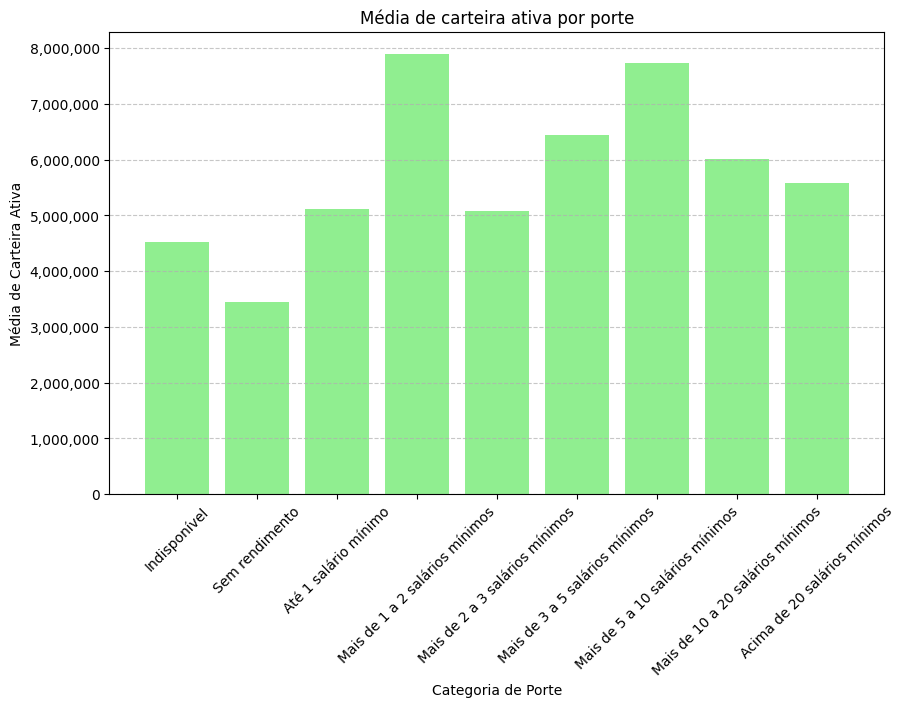

In [8]:
carteira_ativa_por_porte = df.groupby('ct_porte')['vl_carteira_ativa'].mean()

carteira_ativa_por_porte = carteira_ativa_por_porte.reindex(ordem)

carteira_ativa_por_porte = carteira_ativa_por_porte.dropna()

plt.figure(figsize=(10, 6))
plt.bar(carteira_ativa_por_porte.index, carteira_ativa_por_porte.values, color='lightgreen')
plt.title('Média de carteira ativa por porte')
plt.xlabel('Categoria de Porte')
plt.ylabel('Média de Carteira Ativa')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Análises Mari (Label Temporária)

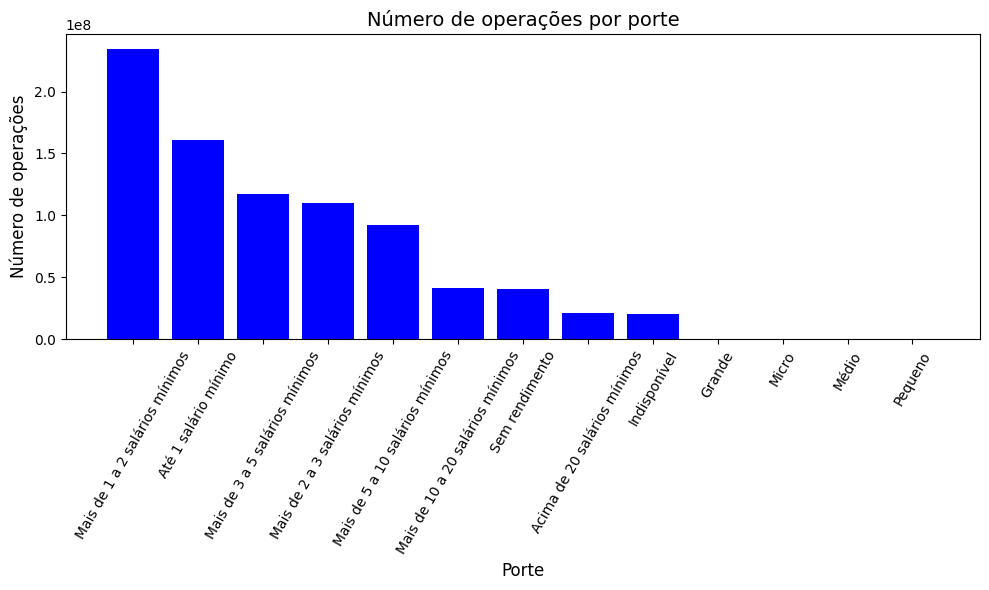

In [9]:
df_grouped = df.groupby('ct_porte')['nu_numero_de_operacoes'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='nu_numero_de_operacoes', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_porte'], df_grouped['nu_numero_de_operacoes'], color='blue')

plt.title('Número de operações por porte', fontsize=14)
plt.xlabel('Porte', fontsize=12)
plt.ylabel('Número de operações', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [10]:
df_grouped = df.groupby('ct_porte')['nu_numero_de_operacoes'].sum().reset_index()

print(df_grouped)

                            ct_porte  nu_numero_de_operacoes
0       Acima de 20 salários mínimos                20956754
1               Até 1 salário mínimo               161120501
2                             Grande                       0
3                       Indisponível                20003465
4     Mais de 1 a 2 salários mínimos               234506815
5   Mais de 10 a 20 salários mínimos                40923435
6     Mais de 2 a 3 salários mínimos               110337789
7     Mais de 3 a 5 salários mínimos               116939428
8    Mais de 5 a 10 salários mínimos                92259455
9                              Micro                       0
10                             Médio                       0
11                           Pequeno                       0
12                    Sem rendimento                40618927


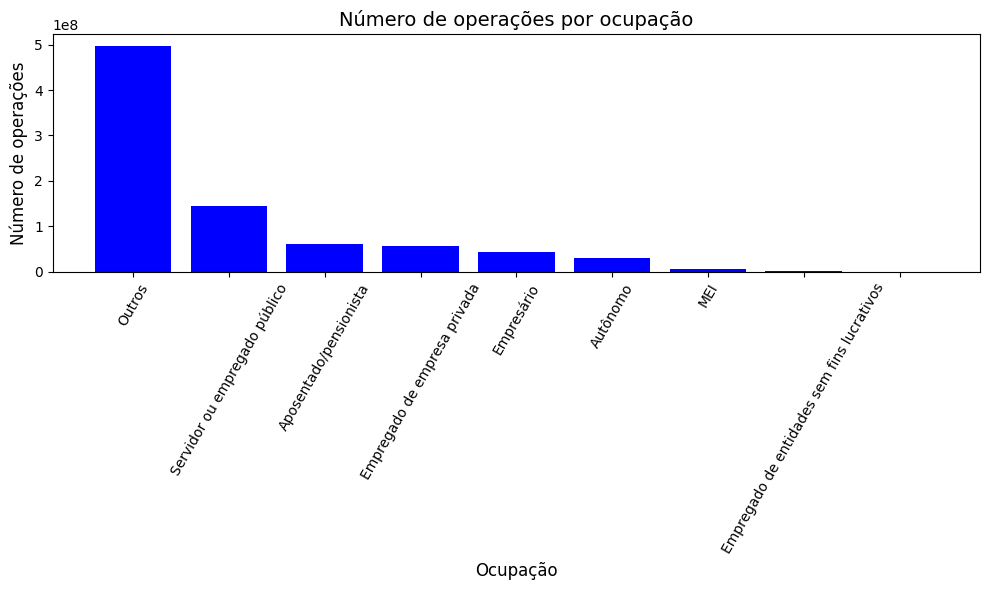

In [11]:
df_grouped = df.groupby('ct_ocupacao')['nu_numero_de_operacoes'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='nu_numero_de_operacoes', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_ocupacao'], df_grouped['nu_numero_de_operacoes'], color='blue')

plt.title('Número de operações por ocupação', fontsize=14)
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Número de operações', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [12]:
df_grouped = df.groupby('ct_ocupacao')['nu_numero_de_operacoes'].sum().reset_index()

print(df_grouped)

                                  ct_ocupacao  nu_numero_de_operacoes
0                                                                   0
1                      Aposentado/pensionista                60523383
2                                    Autônomo                30472781
3                Empregado de empresa privada                55379175
4  Empregado de entidades sem fins lucrativos                  705122
5                                  Empresário                44170444
6                                         MEI                 4751012
7                                      Outros               497944465
8               Servidor ou empregado público               143720187


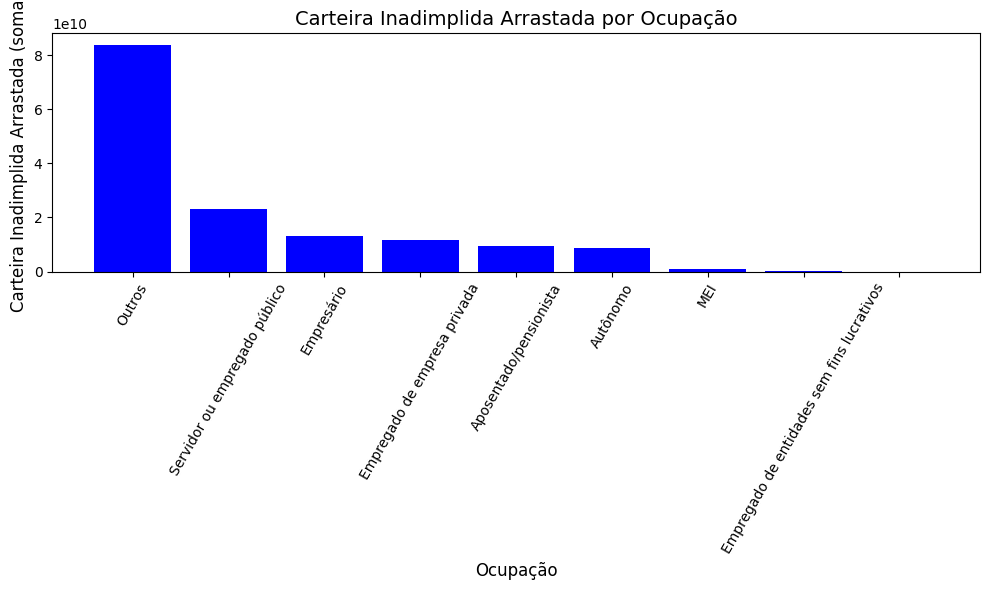

In [13]:
df_grouped = df.groupby('ct_ocupacao')['vl_carteira_inadimplida_arrastada'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='vl_carteira_inadimplida_arrastada', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_ocupacao'], df_grouped['vl_carteira_inadimplida_arrastada'], color='blue')

plt.title('Carteira Inadimplida Arrastada por Ocupação', fontsize=14)
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Carteira Inadimplida Arrastada (soma)', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [14]:
df_grouped = df.groupby('ct_ocupacao')['vl_carteira_inadimplida_arrastada'].sum().reset_index()

print(df_grouped)

                                  ct_ocupacao  \
0                                               
1                      Aposentado/pensionista   
2                                    Autônomo   
3                Empregado de empresa privada   
4  Empregado de entidades sem fins lucrativos   
5                                  Empresário   
6                                         MEI   
7                                      Outros   
8               Servidor ou empregado público   

   vl_carteira_inadimplida_arrastada  
0                               0.00  
1                      9275228990.59  
2                      8640401529.90  
3                     11786468905.25  
4                        80662535.16  
5                     12970773150.72  
6                      1082209671.50  
7                     83891693750.77  
8                     23249983165.02  


### Análises Felipe (Label Temporária)

In [15]:
df = df[df['dt_data_base'] > pd.to_datetime('2013-01-01')]
df = df[df['dt_data_base'] < pd.to_datetime('2023-12-01')]

In [16]:
df

,ct_uf,ct_tcb,ct_sr,ct_cliente,ct_ocupacao,ct_cnae_secao,ct_cnae_subclasse,ct_porte,ct_modalidade,ct_origem,...,vl_a_vencer_acima_de_5400_dias,vl_vencido_acima_de_15_dias,vl_carteira_ativa,vl_carteira_inadimplida_arrastada,vl_ativo_problematico,﻿data_base,dt_data_base,ct_classificacao,vl_carteira_ativa_n_arrastada,ct_faixa_meses_ate_vencimento
index,,,,,,,,,,,,,,,,,,,,,
0,AC,Bancário,NaN,PF,Aposentado/pensionista,-,-,Acima de 20 salários mínimos,Cartão de crédito,Sem destinação específica,...,0.00,0.00,19047.36,0.00,0.00,None,2013-01-31,PF,19047.36,3-12
1,AC,Bancário,NaN,PF,Aposentado/pensionista,-,-,Acima de 20 salários mínimos,Cartão de crédito,Sem destinação específica,...,0.00,39066.97,2450014.35,21077.41,41773.31,None,2013-01-31,PF,2428936.94,12-18
2,AC,Bancário,NaN,PF,Aposentado/pensionista,-,-,Acima de 20 salários mínimos,Empréstimo com consignação em folha,Sem destinação específica,...,0.00,355503.65,15980701.19,675040.84,794358.25,None,2013-01-31,PF,15305660.35,36-180
3,AC,Bancário,NaN,PF,Aposentado/pensionista,-,-,Acima de 20 salários mínimos,Empréstimo sem consignação em folha,Sem destinação específica,...,0.00,63093.90,3794414.23,268549.42,452818.21,None,2013-01-31,PF,3525864.81,36-180
4,AC,Bancário,NaN,PF,Aposentado/pensionista,-,-,Acima de 20 salários mínimos,Habitacional,Com destinação específica,...,0.00,1165.11,1500306.05,0.00,93097.04,None,2013-01-31,PF,1500306.05,36-180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,AL,Bancário,S1,PF,Servidor ou empregado público,-,-,Mais de 5 a 10 salários mínimos,Veículos,Sem destinação específica,...,0.00,751.77,18683.54,0.00,18683.54,None,2023-10-31,PF,18683.54,36-180
10055,AL,Bancário,S1,PF,Servidor ou empregado público,-,-,Sem rendimento,Cartão de crédito,Sem destinação específica,...,0.00,339793.46,628741.28,299080.80,327362.52,None,2023-10-31,PF,329660.48,12-18
10056,AL,Bancário,S1,PF,Servidor ou empregado público,-,-,Sem rendimento,Empréstimo com consignação em folha,Sem destinação específica,...,0.00,35644.16,315351.64,155738.82,181428.07,None,2023-10-31,PF,159612.82,36-180


In [17]:
import pandas as pd

df['dt_data_base'] = pd.to_datetime(df['dt_data_base'])
df['Ano'] = df['dt_data_base'].dt.year

resultados = []
anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

for ano in anos:
    df_ano_especifico = df[df['Ano'].astype(str) == ano]
    valor_acumulado = df_ano_especifico['vl_carteira_inadimplida_arrastada'].sum()
    resultados.append(valor_acumulado)

print(resultados)



[14102594061.47, 15117305851.559998, 15997415795.18, 18449272062.0, 9630821881.59, 7041550973.47, 9775741377.93, 11196265936.939999, 10196345756.339998, 14604715173.96, 15027294450.24]


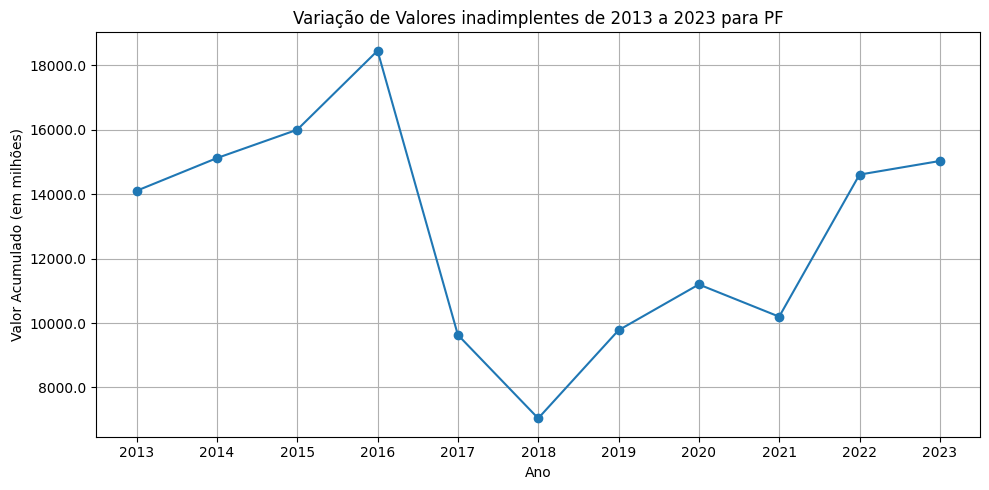

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

plt.figure(figsize=(10, 5))
plt.plot(anos, resultados, marker='o')

def millions(x, pos):
    return f'{x * 1e-6:.1f}' 

plt.title('Variação de Valores inadimplentes de 2013 a 2023 para PF')
plt.xlabel('Ano')
plt.ylabel('Valor Acumulado (em milhões)')
plt.grid(True)
plt.xticks(anos)  

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [21]:
df_filtrado = df[df['nu_numero_de_operacoes'] > 15]

In [58]:

q1 = df_filtrado['nu_numero_de_operacoes'].quantile(0.25)
q3 = df_filtrado['nu_numero_de_operacoes'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df_sem_outliers = df_filtrado[(df_filtrado['nu_numero_de_operacoes'] >= limite_inferior) & (df_filtrado['nu_numero_de_operacoes'] <= limite_superior)]


In [47]:


resultados = []
anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

for ano in anos:
    df_ano_especifico = df_sem_outliers[df_sem_outliers['Ano'] == int(ano)]  
    
    print(f"Ano: {ano}, Linhas: {df_ano_especifico.shape[0]}")
    
    valor_acumulado = df_ano_especifico['nu_numero_de_operacoes'].sum()
    
    resultados.append(valor_acumulado)

print(resultados)


Ano: 2013, Linhas: 18686
Ano: 2014, Linhas: 18100
Ano: 2015, Linhas: 18195
Ano: 2016, Linhas: 18145
Ano: 2017, Linhas: 24293
Ano: 2018, Linhas: 18211
Ano: 2019, Linhas: 25808
Ano: 2020, Linhas: 25088
Ano: 2021, Linhas: 21557
Ano: 2022, Linhas: 21895
Ano: 2023, Linhas: 18282
[5745970, 5947843, 5899025, 5496301, 6473663, 4847875, 7224171, 7045811, 5920411, 5952312, 5009030]


In [35]:
df_sem_outliers['nu_numero_de_operacoes'].describe()

count   228260.00
mean       287.23
std        403.45
min         16.00
25%         37.00
50%        102.00
75%        352.00
max       1939.00
Name: nu_numero_de_operacoes, dtype: float64

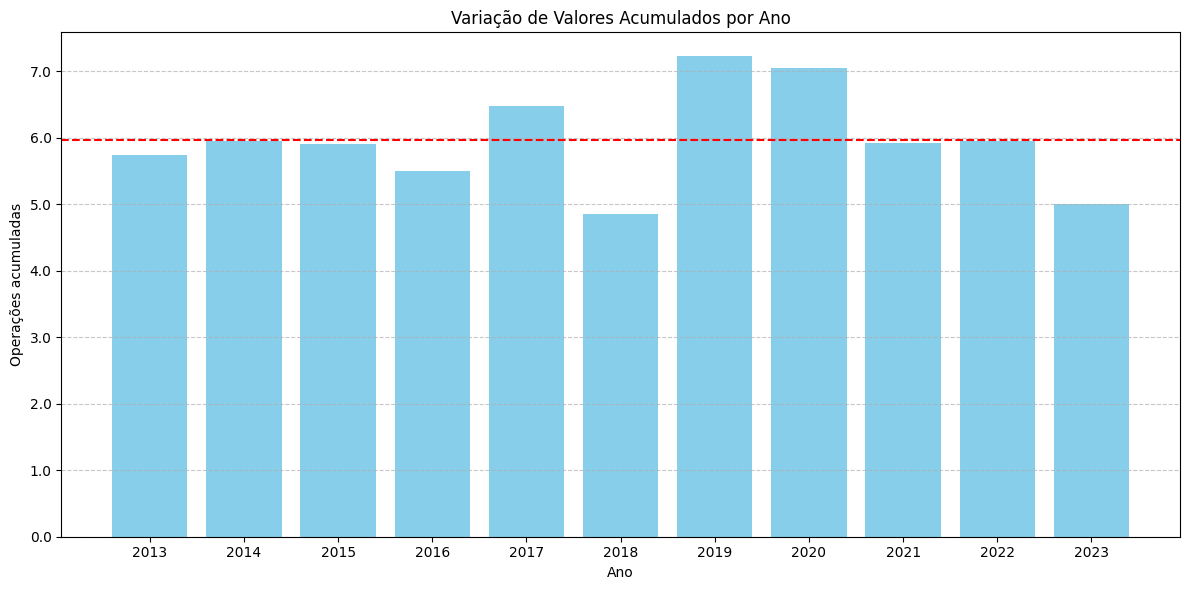

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

resultados = [5745970, 5947843, 5899025, 5496301, 6473663, 4847875, 7224171, 7045811, 5920411, 5952312, 5009030]  # Exemplo de resultados
anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

def millions(x, pos):
    return f'{x * 1e-6:.1f}'  

plt.figure(figsize=(12, 6))
bars = plt.bar(anos, resultados, color='skyblue')

media = np.mean(resultados)
plt.axhline(y=media, color='red', linestyle='--', label='Média: {:.1f} milhões'.format(media * 1e-6))

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel('Ano')
plt.ylabel('Operações acumuladas')
plt.title('Variação de Valores Acumulados por Ano')

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()
